In [1]:
%cd ..

/Users/datvodinh/Documents/Github/data-science-project


### Import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Set plot Style

In [3]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)    # legend fontsize
plt.rc('font', size=10)

# 1. Data Overview

In [4]:
data = pd.read_csv("./data/tgdd.csv")

## Show Info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        249 non-null    object 
 1   CPU Name            249 non-null    object 
 2   CPU manufacturer    249 non-null    object 
 3   CPU brand modifier  245 non-null    float64
 4   CPU generation      242 non-null    float64
 5   CPU Speed (GHz)     247 non-null    float64
 6   RAM (GB)            249 non-null    int64  
 7   RAM Type            249 non-null    object 
 8   Bus (MHz)           249 non-null    int64  
 9   Storage (GB)        249 non-null    int64  
 10  Screen Size (inch)  249 non-null    float64
 11  Screen Resolution   249 non-null    object 
 12  Refresh Rate (Hz)   249 non-null    int64  
 13  Weight (kg)         249 non-null    float64
 14  Battery             249 non-null    float64
 15  Price (VND)         244 non-null    float64
dtypes: float

In [6]:
data.head(3)

,Manufacturer,CPU Name,CPU manufacturer,CPU brand modifier,CPU generation,CPU Speed (GHz),RAM (GB),RAM Type,Bus (MHz),Storage (GB),Screen Size (inch),Screen Resolution,Refresh Rate (Hz),Weight (kg),Battery,Price (VND)
0,hp,Intel Core i3 Alder Lake - 1215U,Intel,3.0,12.0,1.2,8,DDR4,3200,256,14.0,1920x1080,60,1.41,41.0,12990000.0
1,hp,Intel Core i3 Alder Lake - 1215U,Intel,3.0,12.0,1.2,8,DDR4,3200,512,15.6,1920x1080,60,1.69,41.0,13690000.0
2,hp,Intel Core i5 Alder Lake - 1235U,Intel,5.0,12.0,1.3,8,DDR4,3200,512,15.6,1920x1080,60,1.70,41.0,18890000.0


# 2. Exploratory Data Analysis (EDA)

In [7]:
features_data = data.drop('Price (VND)',axis=1)
price_data = data['Price (VND)']

### Check Null Variable

<Axes: >

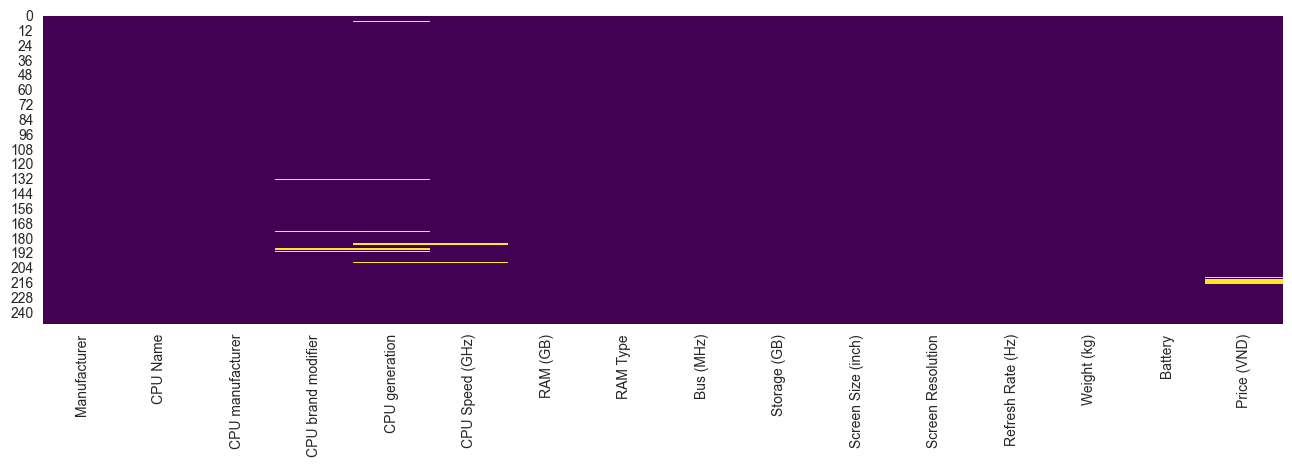

In [8]:
plt.figure(figsize=(16, 4))
sns.heatmap(data.isnull(), cmap='viridis',cbar= False, fmt='.0f')

### Numerical features

In [9]:
numerical_features=[col for col in features_data.columns if features_data[col].dtype!='O']
numerical_features

['CPU brand modifier',
 'CPU generation',
 'CPU Speed (GHz)',
 'RAM (GB)',
 'Bus (MHz)',
 'Storage (GB)',
 'Screen Size (inch)',
 'Refresh Rate (Hz)',
 'Weight (kg)',
 'Battery']

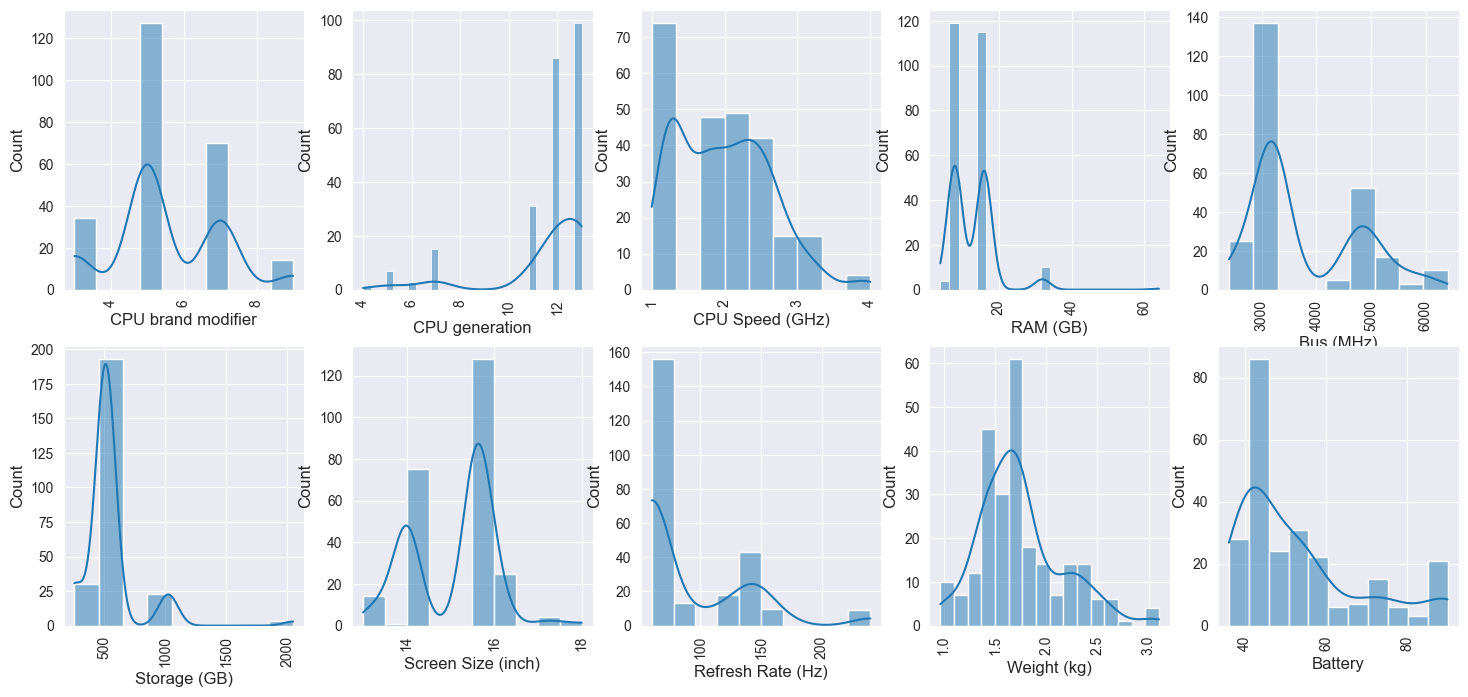

In [10]:
fig, ax = plt.subplots(2,5, figsize=(18,8))
for i in range(len(numerical_features)):
    row,cols = divmod(i, 5)
    sns.histplot(features_data[numerical_features[i]], kde=True, ax=ax[row, cols])
    # rotate x title by 90 degree
    ax[row, cols].xaxis.set_tick_params(rotation=90)
plt.show()

#### Discrete Numerical Values

In [11]:
discrete_col = [col for col in numerical_features if len(features_data[col].unique())<16]
discrete_col

['CPU brand modifier',
 'CPU generation',
 'RAM (GB)',
 'Bus (MHz)',
 'Storage (GB)',
 'Screen Size (inch)',
 'Refresh Rate (Hz)']

#### Correlation Matrix

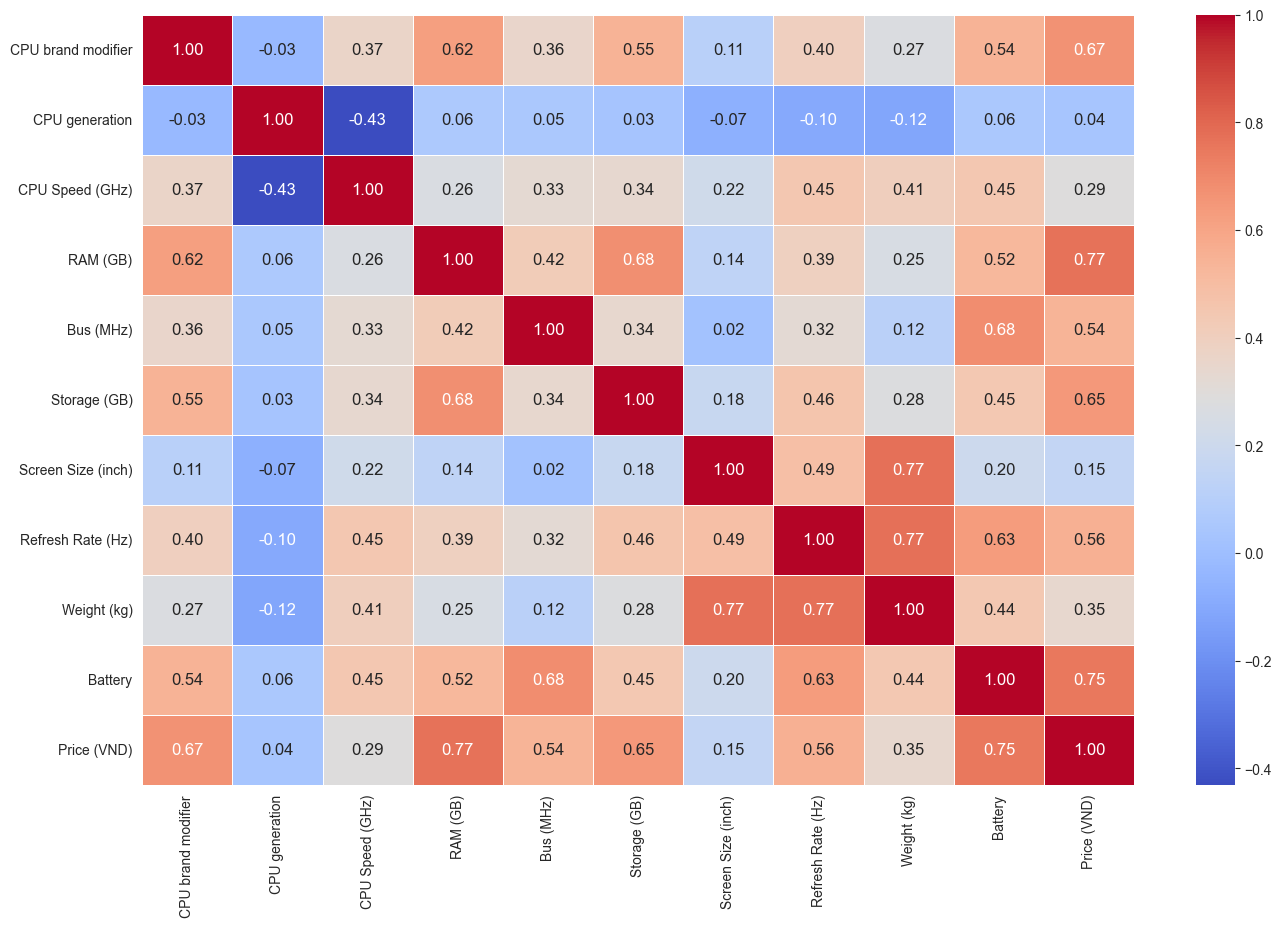

In [12]:
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            linewidths=0.5, annot_kws={"size": 12})
plt.show()

### Categorical Features

In [13]:
categorical_features=[col for col in features_data.columns if features_data[col].dtype=='O']
categorical_features.remove('CPU Name')
categorical_features

['Manufacturer', 'CPU manufacturer', 'RAM Type', 'Screen Resolution']

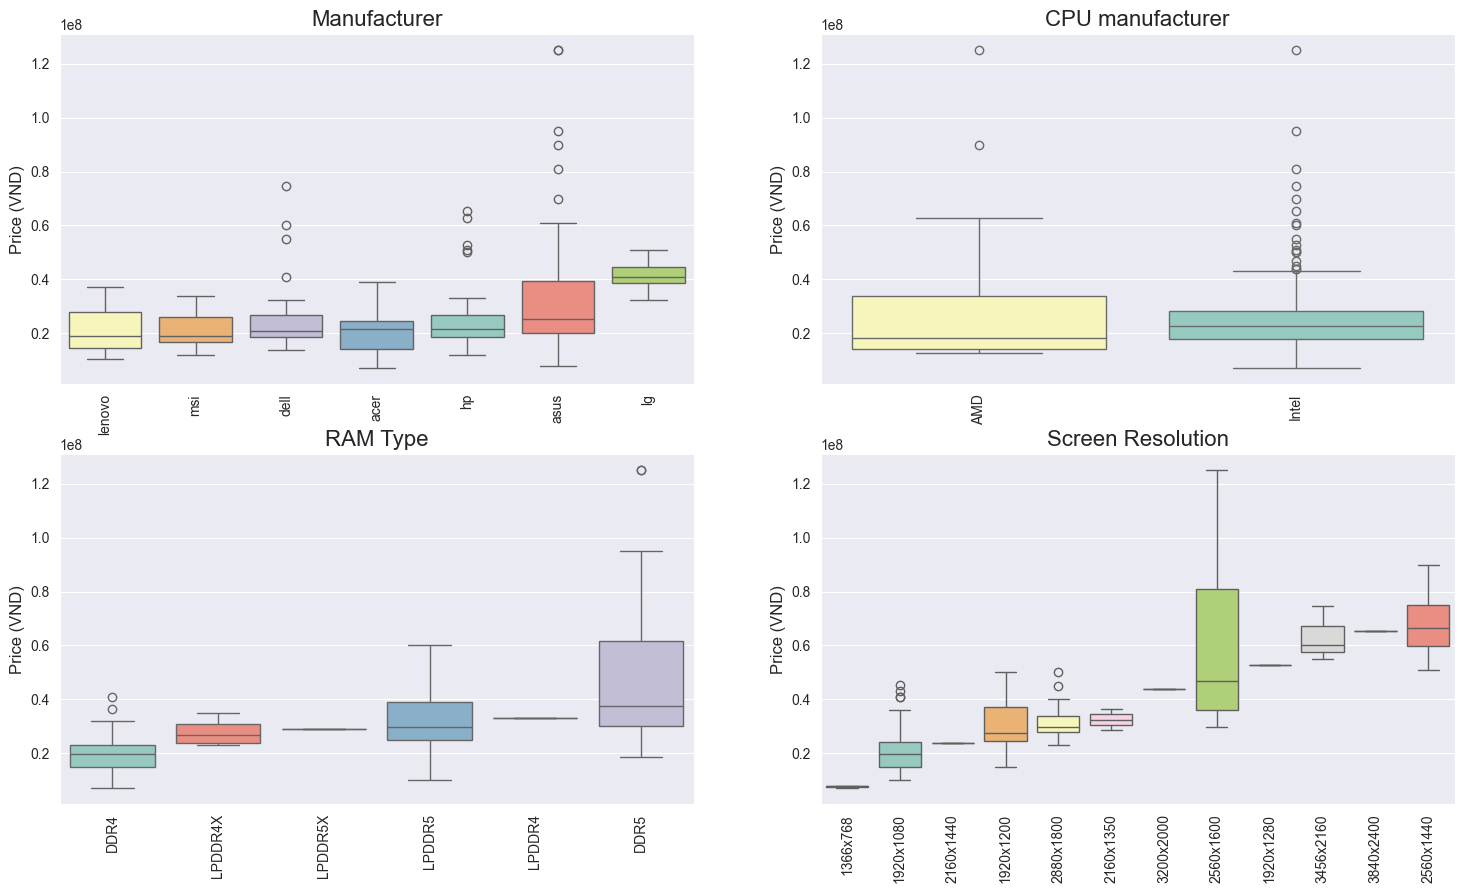

In [14]:
plt.figure(figsize=(18,10))
for i in range(len(categorical_features)):
    plt.subplot(2,2,i+1)
    plt.title(categorical_features[i])
    sns.boxplot(data=data, x=categorical_features[i], y="Price (VND)", palette="Set3", hue=categorical_features[i],legend=False,
                order=data['Price (VND)'].groupby(data[categorical_features[i]]).median().sort_values().index
                )
    plt.xticks(rotation=90)
    plt.xlabel('')

### Price Histogram

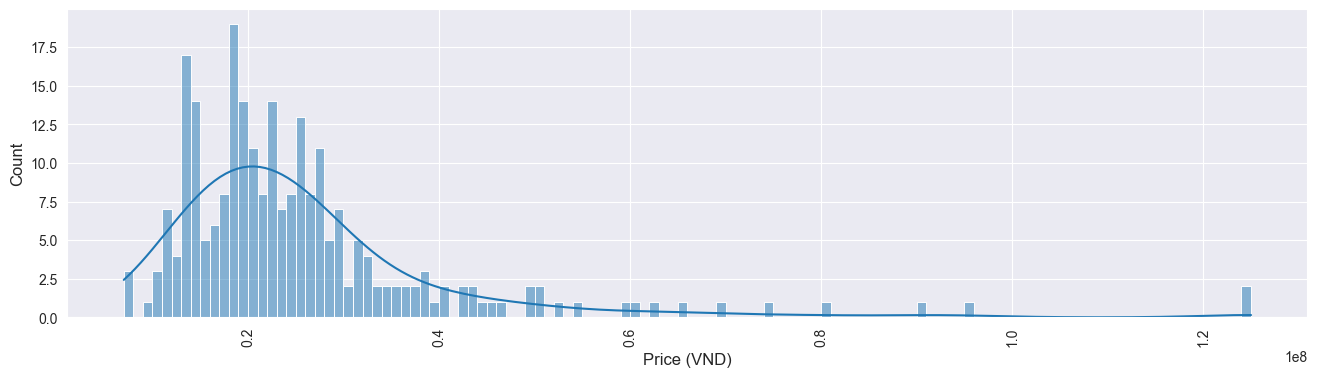

In [15]:
plt.subplots(figsize=(16,4))
sns.histplot(data['Price (VND)'], kde=True, binwidth=1000000)
plt.xticks(rotation=90)
plt.show()

### Outlier

# 3. Data PreProcessing

In [29]:
process_data = data.copy()

## Data Imputation

### Drop all row where price is Nan

<Axes: >

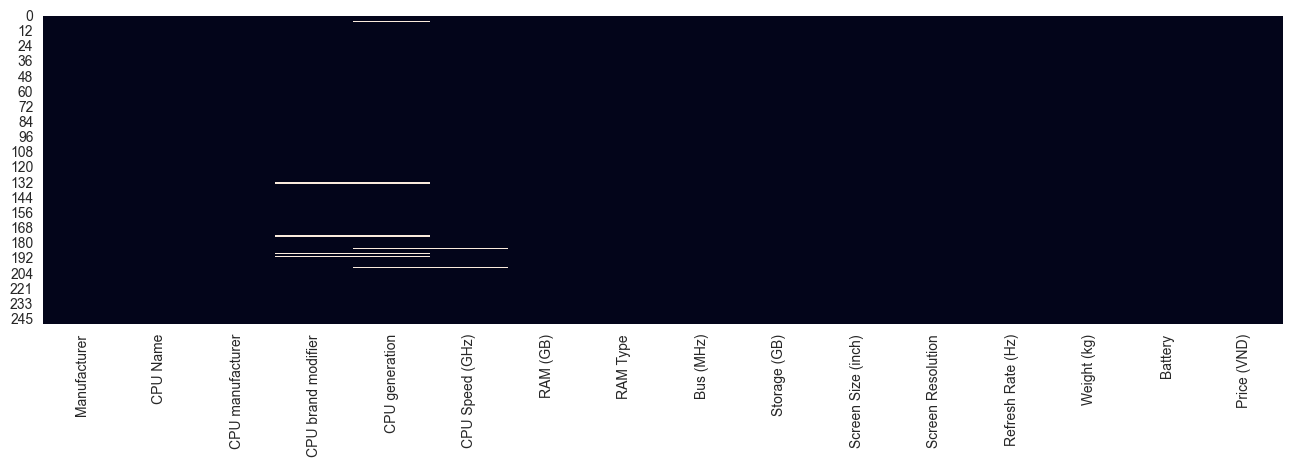

In [30]:
process_data = data.dropna(subset=['Price (VND)'], inplace=False)
plt.figure(figsize=(16, 4))
sns.heatmap(process_data.isnull(), cbar=False)

### Merge CPU manufacter and CPU generation and fill nan for all CPU's stat

In [31]:
process_data['CPU generation'].value_counts()

CPU generation
13.0    95
12.0    86
11.0    30
7.0     15
5.0      7
6.0      3
4.0      1
Name: count, dtype: int64

In [32]:
# calulate median of CPU's stat group by CPU manufacturer (AMD or Intel)
median_brand_modifier = process_data['CPU brand modifier'].groupby(process_data['CPU manufacturer']).median()
median_generation = process_data['CPU generation'].groupby(process_data['CPU manufacturer']).median()
median_speed = process_data['CPU Speed (GHz)'].groupby(process_data['CPU manufacturer']).median()

In [33]:
median_generation

CPU manufacturer
AMD       7.0
Intel    12.0
Name: CPU generation, dtype: float64

In [34]:
process_data['CPU manufacturer'].map(median_generation).value_counts()

CPU manufacturer
12.0    218
7.0      26
Name: count, dtype: int64

In [35]:
# fill nan value of CPU's stat by median of CPU's stat group by CPU manufacturer
process_data['CPU brand modifier'].fillna(data['CPU manufacturer'].map(median_brand_modifier), inplace=True)
process_data['CPU generation'].fillna(data['CPU manufacturer'].map(median_generation), inplace=True)
process_data['CPU Speed (GHz)'].fillna(data['CPU manufacturer'].map(median_speed), inplace=True)

In [36]:
process_data['CPU'] = process_data['CPU manufacturer'] + ' ' + process_data['CPU generation'].astype(str) + "th"

In [37]:
process_data['CPU'].value_counts()

CPU
Intel 13.0th    95
Intel 12.0th    93
Intel 11.0th    30
AMD 7.0th       15
AMD 5.0th        7
AMD 6.0th        3
AMD 4.0th        1
Name: count, dtype: int64

In [38]:
process_data.drop(columns=['CPU manufacturer', 'CPU generation'], axis=1, inplace=True)
process_data.drop(columns=['CPU Name'], axis=1, inplace=True)

In [39]:
len(process_data.columns)

14

## Categorical Variable

### One Hot Encoding

In [40]:
process_data = pd.get_dummies(
    data=process_data,
    columns=['Manufacturer', 'CPU', 'RAM Type', "Screen Resolution"]
    )

In [41]:
process_data.head(1)

,CPU brand modifier,CPU Speed (GHz),RAM (GB),Bus (MHz),Storage (GB),Screen Size (inch),Refresh Rate (Hz),Weight (kg),Battery,Price (VND),...,Screen Resolution_1920x1200,Screen Resolution_1920x1280,Screen Resolution_2160x1350,Screen Resolution_2160x1440,Screen Resolution_2560x1440,Screen Resolution_2560x1600,Screen Resolution_2880x1800,Screen Resolution_3200x2000,Screen Resolution_3456x2160,Screen Resolution_3840x2400
0,3.0,1.2,8,3200,256,14.0,60,1.41,41.0,12990000.0,...,False,False,False,False,False,False,False,False,False,False


In [42]:
# save data
process_data.to_csv('./data/process_data.csv', index=False)